# US Election 2020 Election Forecasting Using Polling Data for Simulations

Polls data taken from [FiveThirtyEight](https://data.fivethirtyeight.com/)

## Steps
1. Understanding the Dataset.
2. Cleaning and Exploring the data.
3. Changing the Data Layout
4. Visualizations of the data
5. Statistical Analysis of Polling Data
6. Simulation of the Data
7. Analyzing the Simulated Data
8. Simulating the Data 10,000 times

### 1. Understanding the Dataset

In [191]:
import pandas as pd 
import numpy as np 

# Importing the data

polls_data = "president_polls.csv"
df = pd.read_csv(polls_data)
df.head(10)

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Biden,13256,Joseph R. Biden Jr.,DEM,48.0
1,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Trump,13254,Donald Trump,REP,47.0
2,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,50.0
3,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Trump,13254,Donald Trump,REP,47.0
4,133777,71435,2020,Georgia,1102,Emerson College,1446,NewsNation,Emerson College,88.0,...,10/19/20 20:06,NaN,https://emersonpolling.reportablenews.com/pr/g...,general,6221,Biden,13256,Joseph R. Biden Jr.,DEM,47.0
5,133777,71435,2020,Georgia,1102,Emerson College,1446,NewsNation,Emerson College,88.0,...,10/19/20 20:06,NaN,https://emersonpolling.reportablenews.com/pr/g...,general,6221,Trump,13254,Donald Trump,REP,48.4
6,133810,71446,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,144.0,...,10/20/20 09:05,NaN,https://www.investors.com/news/trump-vs-biden-...,general,6210,Biden,13256,Joseph R. Biden Jr.,DEM,48.1
7,133810,71446,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,144.0,...,10/20/20 09:05,NaN,https://www.investors.com/news/trump-vs-biden-...,general,6210,Trump,13254,Donald Trump,REP,45.8
8,133810,71446,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,144.0,...,10/20/20 09:05,NaN,https://www.investors.com/news/trump-vs-biden-...,general,6210,Jorgensen,14611,Jo Jorgensen,LIB,3.0
9,133810,71446,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,144.0,...,10/20/20 09:05,NaN,https://www.investors.com/news/trump-vs-biden-...,general,6210,Hawkins,14612,Howie Hawkins,GRE,0.9


In [192]:
# Checking the columns available in the data
df.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'seat_number',
       'seat_name', 'start_date', 'end_date', 'election_date',
       'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'ranked_choice_reallocated', 'created_at', 'notes',
       'url', 'stage', 'race_id', 'answer', 'candidate_id', 'candidate_name',
       'candidate_party', 'pct'],
      dtype='object')

In [193]:
# Let's retain only the information that we'll use, specifically the final results of the poll.
df = df[['question_id','poll_id','state', 'pollster','start_date','end_date','answer','pct']]
df.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
4,133777,71435,Georgia,Emerson College,10/17/20,10/19/20,Biden,47.0


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   question_id  11909 non-null  int64  
 1   poll_id      11909 non-null  int64  
 2   state        7363 non-null   object 
 3   pollster     11909 non-null  object 
 4   start_date   11909 non-null  object 
 5   end_date     11909 non-null  object 
 6   answer       11909 non-null  object 
 7   pct          11909 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 744.4+ KB


In [195]:
# Convertering data type of the 'start_date' & 'end_date' columns to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   question_id  11909 non-null  int64         
 1   poll_id      11909 non-null  int64         
 2   state        7363 non-null   object        
 3   pollster     11909 non-null  object        
 4   start_date   11909 non-null  datetime64[ns]
 5   end_date     11909 non-null  datetime64[ns]
 6   answer       11909 non-null  object        
 7   pct          11909 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 744.4+ KB


C:\Users\Keith Fernandes\AppData\Local\Temp\ipykernel_12208\3644650790.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Keith Fernandes\AppData\Local\Temp\ipykernel_12208\3644650790.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [196]:
# Number of unique Pollsters
print((len(df.pollster.unique())))

196


In [197]:
# Number of Polls conducted
print((len(df.poll_id.unique())))

2896


In [198]:
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0
...,...,...,...,...,...,...,...,...
11904,92081,57026,Ohio,Public Policy Polling,2018-11-27,2018-11-28,Trump,46.0
11905,92082,57026,Ohio,Public Policy Polling,2018-11-27,2018-11-28,Warren,43.0
11906,92082,57026,Ohio,Public Policy Polling,2018-11-27,2018-11-28,Trump,49.0
11907,92078,57025,NaN,Rasmussen Reports/Pulse Opinion Research,2018-11-12,2018-11-13,Obama,50.0


### 2. Cleaning and Exploring the data

In [199]:
# Filtering out polls that aren't from the 3 months leading up to the November 2nd Election Data (Between August 1st and November 2nd 2020)
start_date = '2020-08-01'
end_date = '2020-11-02'

mask = (df['start_date'] >= start_date) & (df['end_date'] <= end_date)
mask

0         True
1         True
2         True
3         True
4         True
         ...  
11904    False
11905    False
11906    False
11907    False
11908    False
Length: 11909, dtype: bool

In [200]:
df = df.loc[mask]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.00
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.00
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.00
...,...,...,...,...,...,...,...,...
5288,127307,67986,NaN,Morning Consult,2020-08-01,2020-08-03,Trump,42.00
5289,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,52.72
5290,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Trump,44.88
5291,132632,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,51.92


In [201]:
# All the candidates in the polls
df.answer.unique()

array(['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'West', 'Pence',
       'Harris', 'Blankenship', 'De La Fuente', 'La Riva', 'Pierce',
       'Kennedy', 'Simmons'], dtype=object)

In [202]:
# Removing all 3rd party candidates
candidates = ['Trump' , 'Biden']
df = df.loc[df['answer'].isin(candidates)]
df.answer.unique()

array(['Biden', 'Trump'], dtype=object)

In [203]:
print(len(df))

4648


In [204]:
# Removing National Polls labelled as NaN
df = df[df['state'].notna()]
print(len(df))


3202


In [205]:
len(df.poll_id.unique())

1062

In [206]:
# Each poll occupies 2 lines
df.loc[df['poll_id'] == 71450]

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0


### 3. Changing the Data Layout

In [207]:
# Chaning the index to start with 1 instead of 0
df.index = np.arange(1,len(df)+1)

df['join_index'] = df.index + 1
df['join_index']

1          2
2          3
3          4
4          5
5          6
        ... 
3198    3199
3199    3200
3200    3201
3201    3202
3202    3203
Name: join_index, Length: 3202, dtype: int32

In [208]:
# Extracting the odd rows out
odd_rows = df[df.index % 2 == 1]
odd_rows.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,8
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,10


In [209]:
# Putting the polls with the same poll_id on the same line for easier data processing
grouped = odd_rows.join(df, on='join_index' ,rsuffix='second')
grouped

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_idsecond,poll_idsecond,statesecond,pollstersecond,start_datesecond,end_datesecond,answersecond,pctsecond,join_indexsecond
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,3
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,5
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,6,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,7
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,8,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,9
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,10,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Biden,49.0,3194,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Trump,45.0,3195
3195,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Biden,48.0,3196,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Trump,51.0,3197
3197,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Biden,49.0,3198,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0,3199
3199,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0,3200,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0,3201


In [210]:
# Removing all the repeated columns to make the data cleaner
grouped = grouped.loc[:,['question_id', 'poll_id', 'state', 'pollster', 'start_date', 'end_date',
       'answer', 'pct','answersecond', 'pctsecond']]
grouped.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,answersecond,pctsecond
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,Trump,47.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,Trump,47.0
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,Trump,48.4
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,Trump,45.0
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,Trump,45.0


In [211]:
grouped.answer.unique()

array(['Biden'], dtype=object)

In [212]:
grouped.answersecond.unique()

array(['Trump'], dtype=object)

In [213]:
# Renaming the column 'pct' to 'Biden' and the column 'pctsecond' to 'Trump' as they contain the respective percentages of that candidate for the specific poll
# Removing the columns 'answer' and 'answersecond' to make the data cleaner
grouped.rename(columns={'pct' : 'Biden', 'pctsecond' : 'Trump'}, inplace=True)
grouped.drop(['answer', 'answersecond'], axis=1, inplace=True)
grouped.head()

,question_id,poll_id,state,pollster,start_date,end_date,Biden,Trump
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,48.0,47.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,50.0,47.0
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,47.0,48.4
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,49.0,45.0
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,49.0,45.0


In [214]:
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2'], dtype=object)

In [215]:
#Removing the suffix of 'CD-1' & 'CD-2' from the state names
grouped['state'] = grouped['state'].str.replace(r' CD-1','')
grouped['state'] = grouped['state'].str.replace(r' CD-2','')
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska'], dtype=object)

#### In the US Electral Process there are 538 Seats and a candidate requires 270 to win.
##### The USA Electral Map
![alt text](https://classroommagazines.scholastic.com/content/dam/classroom-magazines/magazines/election/election-2020/civics-in-action/the-electoral-college/ELECTION_ELECTORALCOLLEGE_HEADER_MAP.jpg)

In [216]:
# Assigning each state with their number of seats
states = {
    "Alabama": 9,
    "Alaska": 3,
    "Arizona": 11,
    "Arkansas": 6,
    "California": 55,
    "Colorado": 9,
    "Connecticut": 7,
    "Delaware": 3,
    "District of Columbia": 3,
    "Florida": 29,
    "Georgia": 16,
    "Hawaii": 4,
    "Idaho": 4,
    "Illinois": 20,
    "Indiana": 11,
    "Iowa": 6,
    "Kansas": 6,
    "Kentucky": 8,
    "Louisiana": 8,
    "Maine": 4,
    "Maryland": 10,
    "Massachusetts": 11,
    "Michigan": 16,
    "Minnesota": 10,
    "Mississippi": 6,
    "Missouri": 10,
    "Montana": 3,
    "Nebraska": 5,
    "Nevada": 6,
    "New Hampshire": 4,
    "New Jersey": 14,
    "New Mexico": 5,
    "New York": 29,
    "North Carolina": 15,
    "North Dakota": 3,
    "Ohio": 18,
    "Oklahoma": 7,
    "Oregon": 7,
    "Pennsylvania": 20,
    "Rhode Island": 4,
    "South Carolina": 9,
    "South Dakota": 3,
    "Tennessee": 11,
    "Texas": 38,
    "Utah": 6,
    "Vermont": 3,
    "Virginia": 13,
    "Washington": 12,
    "West Virginia": 5,
    "Wisconsin": 10,
    "Wyoming": 3,
}

In [217]:
def getSeats(row):
    return states[row['state']]

grouped['Seats'] = grouped.apply(getSeats, axis=1)
grouped

,question_id,poll_id,state,pollster,start_date,end_date,Biden,Trump,Seats
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,48.0,47.0,18
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,50.0,47.0,20
5,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,47.0,48.4,16
7,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,49.0,45.0,20
9,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,49.0,45.0,20
...,...,...,...,...,...,...,...,...,...
3193,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,49.0,45.0,11
3195,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,48.0,51.0,11
3197,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,49.0,49.0,29
3199,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,50.0,46.0,20


### 4. Visualizations

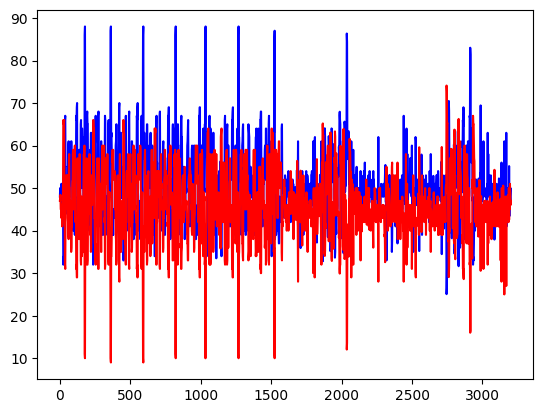

In [218]:
import matplotlib.pyplot as plt

plt.plot(grouped.index, grouped['Biden'], color="Blue")
plt.plot(grouped.index, grouped['Trump'], color="Red")

In [219]:
#Plotting the difference by date
diff_by_date = grouped.groupby('start_date')[['Biden', 'Trump']].mean().reset_index()
diff_by_date['difference'] = diff_by_date['Biden'] - diff_by_date['Trump']

In [220]:
import plotly.express as px
fig = px.line(diff_by_date, x='start_date', y='difference', title='Biden v/s Trump Difference')
fig.show()

In [221]:
# Tidying up the data
polls = grouped[['state','pollster','start_date','end_date','Biden', 'Trump', 'Seats']]
polls.head()

,state,pollster,start_date,end_date,Biden,Trump,Seats
1,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,48.0,47.0,18
3,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,50.0,47.0,20
5,Georgia,Emerson College,2020-10-17,2020-10-19,47.0,48.4,16
7,Pennsylvania,Ipsos,2020-10-13,2020-10-19,49.0,45.0,20
9,Pennsylvania,Ipsos,2020-10-13,2020-10-19,49.0,45.0,20


### 5. Statistical Analysis of Polling Data
Using a normal distribution for simplicity. Creating a normal distribution for every states from 0 to 100.<br>
The distribution will be centered between the Biden vote and the Trump vote. The standard Deviation will be half of the undecided vote plus 3. <br>
(The plus 3 is to ensure that the distribution reflects a resonable spread of potential voting outcomes)

In [222]:
# Adding the center
def get_center(row):
    return row['Biden'] + (100 - row['Biden'] - row['Trump'])/2

polls['center'] = polls.apply(get_center, axis=1)

C:\Users\Keith Fernandes\AppData\Local\Temp\ipykernel_12208\3619032667.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
# Adding the Standard Deviations (std_dev)
def get_std_dev(row):
    #Sort of a gussitmate for STD
    return (abs(row['Trump'] - row['center']) / 2 + 3)
# The 3 added is to ensure that the distribution is sufficiently wide to account for variability and uncertainty in the actual voting outcomes.

polls['std_dev'] = polls.apply(get_std_dev, axis=1)
 
polls

,state,pollster,start_date,end_date,Biden,Trump,Seats,center,std_dev
1,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,48.0,47.0,18,50.5,4.75
3,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,50.0,47.0,20,51.5,5.25
5,Georgia,Emerson College,2020-10-17,2020-10-19,47.0,48.4,16,49.3,3.45
7,Pennsylvania,Ipsos,2020-10-13,2020-10-19,49.0,45.0,20,52.0,6.50
9,Pennsylvania,Ipsos,2020-10-13,2020-10-19,49.0,45.0,20,52.0,6.50
...,...,...,...,...,...,...,...,...,...
3193,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,49.0,45.0,11,52.0,6.50
3195,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,48.0,51.0,11,48.5,4.25
3197,Florida,OnMessage Inc.,2020-08-02,2020-08-04,49.0,49.0,29,50.0,3.50
3199,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,50.0,46.0,20,52.0,6.00


#### Averaging all polls
This isn't the best method as it disregards any weighting to better polls and assume all are equal.

In [224]:
poll_state_summary = polls.drop(['pollster', 'start_date','end_date'], axis=1).groupby('state').mean().reset_index()
poll_state_summary

,state,Biden,Trump,Seats,center,std_dev
0,Alabama,39.769048,57.161429,9.0,41.303810,10.928810
1,Alaska,44.020000,52.478636,3.0,45.770682,6.558523
2,Arizona,49.248514,45.155946,11.0,52.046284,6.552061
3,Arkansas,38.753684,58.801579,6.0,39.976053,12.412763
4,California,62.081923,33.621154,55.0,64.230385,18.304615
5,Colorado,55.022903,40.454194,9.0,57.284355,11.415081
6,Connecticut,62.420000,34.561111,7.0,63.929444,17.684167
7,Delaware,63.388500,33.953500,3.0,64.717500,18.382000
8,District of Columbia,86.283889,11.117222,3.0,87.583333,41.233056
9,Florida,48.740263,46.046842,29.0,51.346711,5.706118


### 6. Simulation of the Data
1. We are going to generate a random number from the distribution.
2. If it is above 50, Biden will be the winner for that state.
3. If it is below 50, Trump will be the winner for that state.
4. Who ever wins that state will be given the electoral seats represented by that state.

In [225]:
from numpy.random import normal

def run_election_simulation(times, polls):
    # Creating a blank data frame to hold our results.
    result_frame = pd.DataFrame()

    def get_seats(row):
        # Using the Normal Distribution function, we input the mean (center) and STD
        # If the result is greater than 50, that indicates a win for Biden
        result = normal(row['center'], row['std_dev'])
        return row['Seats'] if result > 50 else 0
    
    for i in range(times):
        result_frame[i] = polls.apply(get_seats, axis = 1)
        
    return result_frame

# Example of the output
res = run_election_simulation(10, poll_state_summary)
res.loc['Total Biden Seats',:] = res.sum(axis=0)

# Adding the state names to the result DataFrame
res = pd.concat([poll_state_summary['state'],res], axis=1, sort= False)

# A 0.0 indicates Biden didn't win in that state (Trump won in that state)
res

,state,0,1,2,3,4,5,6,7,8,9
0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaska,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arizona,0.0,11.0,11.0,0.0,11.0,11.0,0.0,11.0,11.0,11.0
3,Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,California,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
5,Colorado,9.0,9.0,9.0,9.0,0.0,0.0,0.0,0.0,9.0,9.0
6,Connecticut,7.0,7.0,7.0,0.0,7.0,7.0,0.0,7.0,7.0,7.0
7,Delaware,3.0,3.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0
8,District of Columbia,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,Florida,0.0,29.0,29.0,29.0,0.0,29.0,29.0,0.0,0.0,29.0


### 7. Analyzing the Simulated Data

In [226]:
# Converting the values to integers, counting the 0.0 that indicate Trump wins in that state
summary = pd.DataFrame((res == 0).astype(int).sum(axis=1))

# Adding the corresponding states to it
res_summary = pd.concat([poll_state_summary['state'], summary], axis=1, sort= False)
res_summary.columns = ['state', 'trump_wins']

# Adding a column to represent the percentage of times Trump won in that given state
res_summary['pct_trump_wins'] = (res_summary['trump_wins'] / 10) * 100

res_summary

,state,trump_wins,pct_trump_wins
0,Alabama,10,100.0
1,Alaska,9,90.0
2,Arizona,3,30.0
3,Arkansas,9,90.0
4,California,0,0.0
5,Colorado,4,40.0
6,Connecticut,2,20.0
7,Delaware,1,10.0
8,District of Columbia,1,10.0
9,Florida,4,40.0


In [227]:
# Sum of Biden wins across the simulation
res.loc['Total Biden Seats'][res.loc['Total Biden Seats']> 270.0].count()

8

### 8. Simulating the Data 10,000 times

In [ ]:
number_of_simulations = 10000

election_results = run_election_simulation(number_of_simulations, poll_state_summary)
election_results.loc['Total',:] = election_results.sum(axis=0)

biden_wins = election_results.loc['Total'][election_results.loc['Total'] > 270.0].count()

In [231]:
f"Joe Biden wins {biden_wins} times out of {number_of_simulations} simulations"

'Joe Biden wins 7920 times out of 10000 simulations'

#### Summarizing the results per state

In [245]:
summary = pd.DataFrame((election_results == 0).astype(int).sum(axis=1))
res_summary = pd.concat([poll_state_summary['state'], summary], axis=1, sort= False)
res_summary.columns = ['state', 'trump_wins']
res_summary['biden_wins'] = number_of_simulations - res_summary['trump_wins']
res_summary['pct_trump_wins'] = (res_summary['trump_wins'] / number_of_simulations) * 100
res_summary['pct_biden_wins'] = 100 - res_summary['pct_trump_wins']
res_summary = res_summary.dropna()
res_summary

,state,trump_wins,biden_wins,pct_trump_wins,pct_biden_wins
0,Alabama,7853,2147,78.53,21.47
1,Alaska,7403,2597,74.03,25.97
2,Arizona,3773,6227,37.73,62.27
3,Arkansas,7929,2071,79.29,20.71
4,California,2211,7789,22.11,77.89
5,Colorado,2650,7350,26.50,73.50
6,Connecticut,2165,7835,21.65,78.35
7,Delaware,2105,7895,21.05,78.95
8,District of Columbia,1850,8150,18.50,81.50
9,Florida,3974,6026,39.74,60.26


In [258]:
def GetSeats(row):
    return states[row['state']]

res_summary['seats'] = res_summary.apply(GetSeats, axis = 1)

res_summary['seats_trump_wins'] = res_summary['pct_trump_wins'].apply(lambda x:1 if x>50 else 0)
res_summary['seats_trump_wins'] = res_summary['seats_trump_wins'] * res_summary['seats']

res_summary['seats_biden_wins'] = res_summary['pct_biden_wins'].apply(lambda x:1 if x>50 else 0)
res_summary['seats_biden_wins'] = res_summary['seats_biden_wins'] * res_summary['seats']

seats_trump_wins = res_summary['seats_trump_wins'].sum()
seats_biden_wins = res_summary['seats_biden_wins'].sum()

print("Seats won by Trump : ",seats_trump_wins)
print("Seats won by Biden : ",seats_biden_wins)

res_summary



Seats won by Trump :  188
Seats won by Biden :  350


,state,trump_wins,biden_wins,pct_trump_wins,pct_biden_wins,seats,seats_trump_wins,seats_biden_wins
0,Alabama,7853,2147,78.53,21.47,9,9,0
1,Alaska,7403,2597,74.03,25.97,3,3,0
2,Arizona,3773,6227,37.73,62.27,11,0,11
3,Arkansas,7929,2071,79.29,20.71,6,6,0
4,California,2211,7789,22.11,77.89,55,0,55
5,Colorado,2650,7350,26.50,73.50,9,0,9
6,Connecticut,2165,7835,21.65,78.35,7,0,7
7,Delaware,2105,7895,21.05,78.95,3,0,3
8,District of Columbia,1850,8150,18.50,81.50,3,0,3
9,Florida,3974,6026,39.74,60.26,29,0,29


#### Visualising the above data on the US Election Map

In [273]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

res_summary = res_summary.replace({'state': us_state_abbrev})
res_summary.head(5)

,state,trump_wins,biden_wins,pct_trump_wins,pct_biden_wins,seats,seats_trump_wins,seats_biden_wins
0,AL,7853,2147,78.53,21.47,9,9,0
1,AK,7403,2597,74.03,25.97,3,3,0
2,AZ,3773,6227,37.73,62.27,11,0,11
3,AR,7929,2071,79.29,20.71,6,6,0
4,CA,2211,7789,22.11,77.89,55,0,55


In [276]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations= res_summary['state'],
    z = res_summary['pct_trump_wins'].astype(float), # Data to be color-coded
    locationmode= 'USA-states',                      # Set of location match entries in 'locations'
    colorscale= 'Bluered',
    colorbar_title= 'Trump',    
))

title = f'{number_of_simulations} Simulations of the 2020 US Election show Biden winning {seats_biden_wins} and Trump winning {seats_trump_wins} Seats'
fig.update_layout(
    title_text = title, #'2020 Simulation of The US Presidential Election',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [281]:
res_summary['color'] = res_summary['pct_trump_wins'].apply(lambda x: '> 50%' if x > 50 else '< 50%')

color_discrete_map = {
    '> 50%': 'red',
    '< 50%': 'blue'
}

fig2 = px.choropleth(
    res_summary,
    locations='state',
    locationmode='USA-states',
    color='color',
    color_discrete_map=color_discrete_map,
    scope='usa',
    hover_data=['seats'],
    labels={'color': 'Trump Win %'}
)

title = f'{number_of_simulations} Simulations of the 2020 US Election show Biden winning {seats_biden_wins} and Trump winning {seats_trump_wins} Seats'
fig2.update_layout(
    title_text=title,
)

fig2.show()